# Data Cleaning
Remove nans, unnecessary columns, etc...

## Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Datasets

In [2]:
# load dataset
h_price = pd.read_csv("King_County_House_prices_dataset.csv", na_values=['?'])

## Overview

In [3]:
print('#### King County set ####')
print('# of observations: {}'.format(h_price.shape[0]))
print('# of features:        {}'.format(h_price.shape[1]))

#### King County set ####
# of observations: 21597
# of features:        21


## Check Columns
Short Analysis of Columns, eg types, nans etc

In [4]:
h_price.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

* date is object, turn into numeric data
* Check why sqft_basement is object

In [5]:
## number of nans in columns
print(h_price.isna().sum())
# percentage
print(h_price.isna().sum()/h_price.shape[0])

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.021021
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_

* more than 10 % missing in waterfront, yr_renovated -> don't just delete values
* view only 63 missing values, sqft_basement only 454, can be removed

In [6]:
# Remove nans from view and sqft_basement
h_price.dropna(subset=['view', 'sqft_basement'], inplace=True)

## Date
Change date to computer readable data!\
__Year__ is __useless__, since it's noly data from one year. __Day__ is useless anyway.

In [7]:
h_price.date.head(3)

0    10/13/2014
1     12/9/2014
2     2/25/2015
Name: date, dtype: object

In [8]:
h_price['date_m'] = np.array([i.split('/')[0] for i in h_price.date.values]).astype(int)
#h_price['date_d'] = np.array([i.split('/')[1] for i in h_price.date.values]).astype(int)
#h_price['date_y'] = np.array([i.split('/')[2] for i in h_price.date.values]).astype(int)
h_price.drop('date', axis=1, inplace=True)

## Turn feet to m
Turn all sizes to meter, better to comprehend. 1 feet is 0.3048 m.

In [9]:
conv = 0.3048**2 # conversion factor
# loop over all sqft features
for i in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']:
    name = i.replace('sqft', 'm2') # new name
    h_price[name] = h_price[i] * conv # convert unit
    h_price.drop(i, axis=1, inplace=True) # remove sqft from dataframe

## Id
Feature useless for analysis or modeling, __remove__ it!

In [10]:
h_price.drop('id', axis=1, inplace=True)

## Bedrooms
Bedrooms has maximal value of 33 Bedrooms, which is pretty unrealistic. Coordinates show small house, therefore false value, __remove__ it!

In [11]:
# show house info
h_price[h_price.bedrooms.argmax():h_price.bedrooms.argmax()+1]

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,date_m,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
15856,640000.0,33,1.75,1.0,0.0,0.0,5,7,1947,0.0,98103,47.6878,-122.331,6,150.502925,557.41824,96.619162,53.883763,123.561043,436.644288


In [12]:
h_price.drop(h_price.index[h_price.bedrooms.argmax()], inplace=True)

## Waterfront

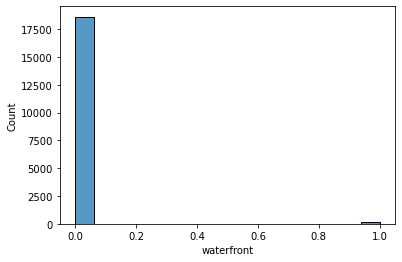

In [13]:
sns.histplot(data=h_price, x='waterfront');

Waterfront is way too __unbalanced__. __Remove__ feature!

In [14]:
h_price.drop('waterfront', axis=1, inplace=True)

## Save data to new file

In [15]:
# Turn data to train and test set
print('## New Datasets ##')
print('# of obs in cleaned set: {}'.format(h_price.shape[0]))
print('# of features:         {}'.format(h_price.shape[1]))

## New Datasets ##
# of obs in cleaned set: 21081
# of features:         19


In [16]:
# Save to file
h_price.to_csv('King_County_cleaned.csv', index=False)